### 1. Import data and plot trajectories for a selected list of parasites.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Load Data
data = pd.read_csv('/Users/amberhenry/Downloads/data-SPZ-in-skin-to-analyze(dataset).csv')

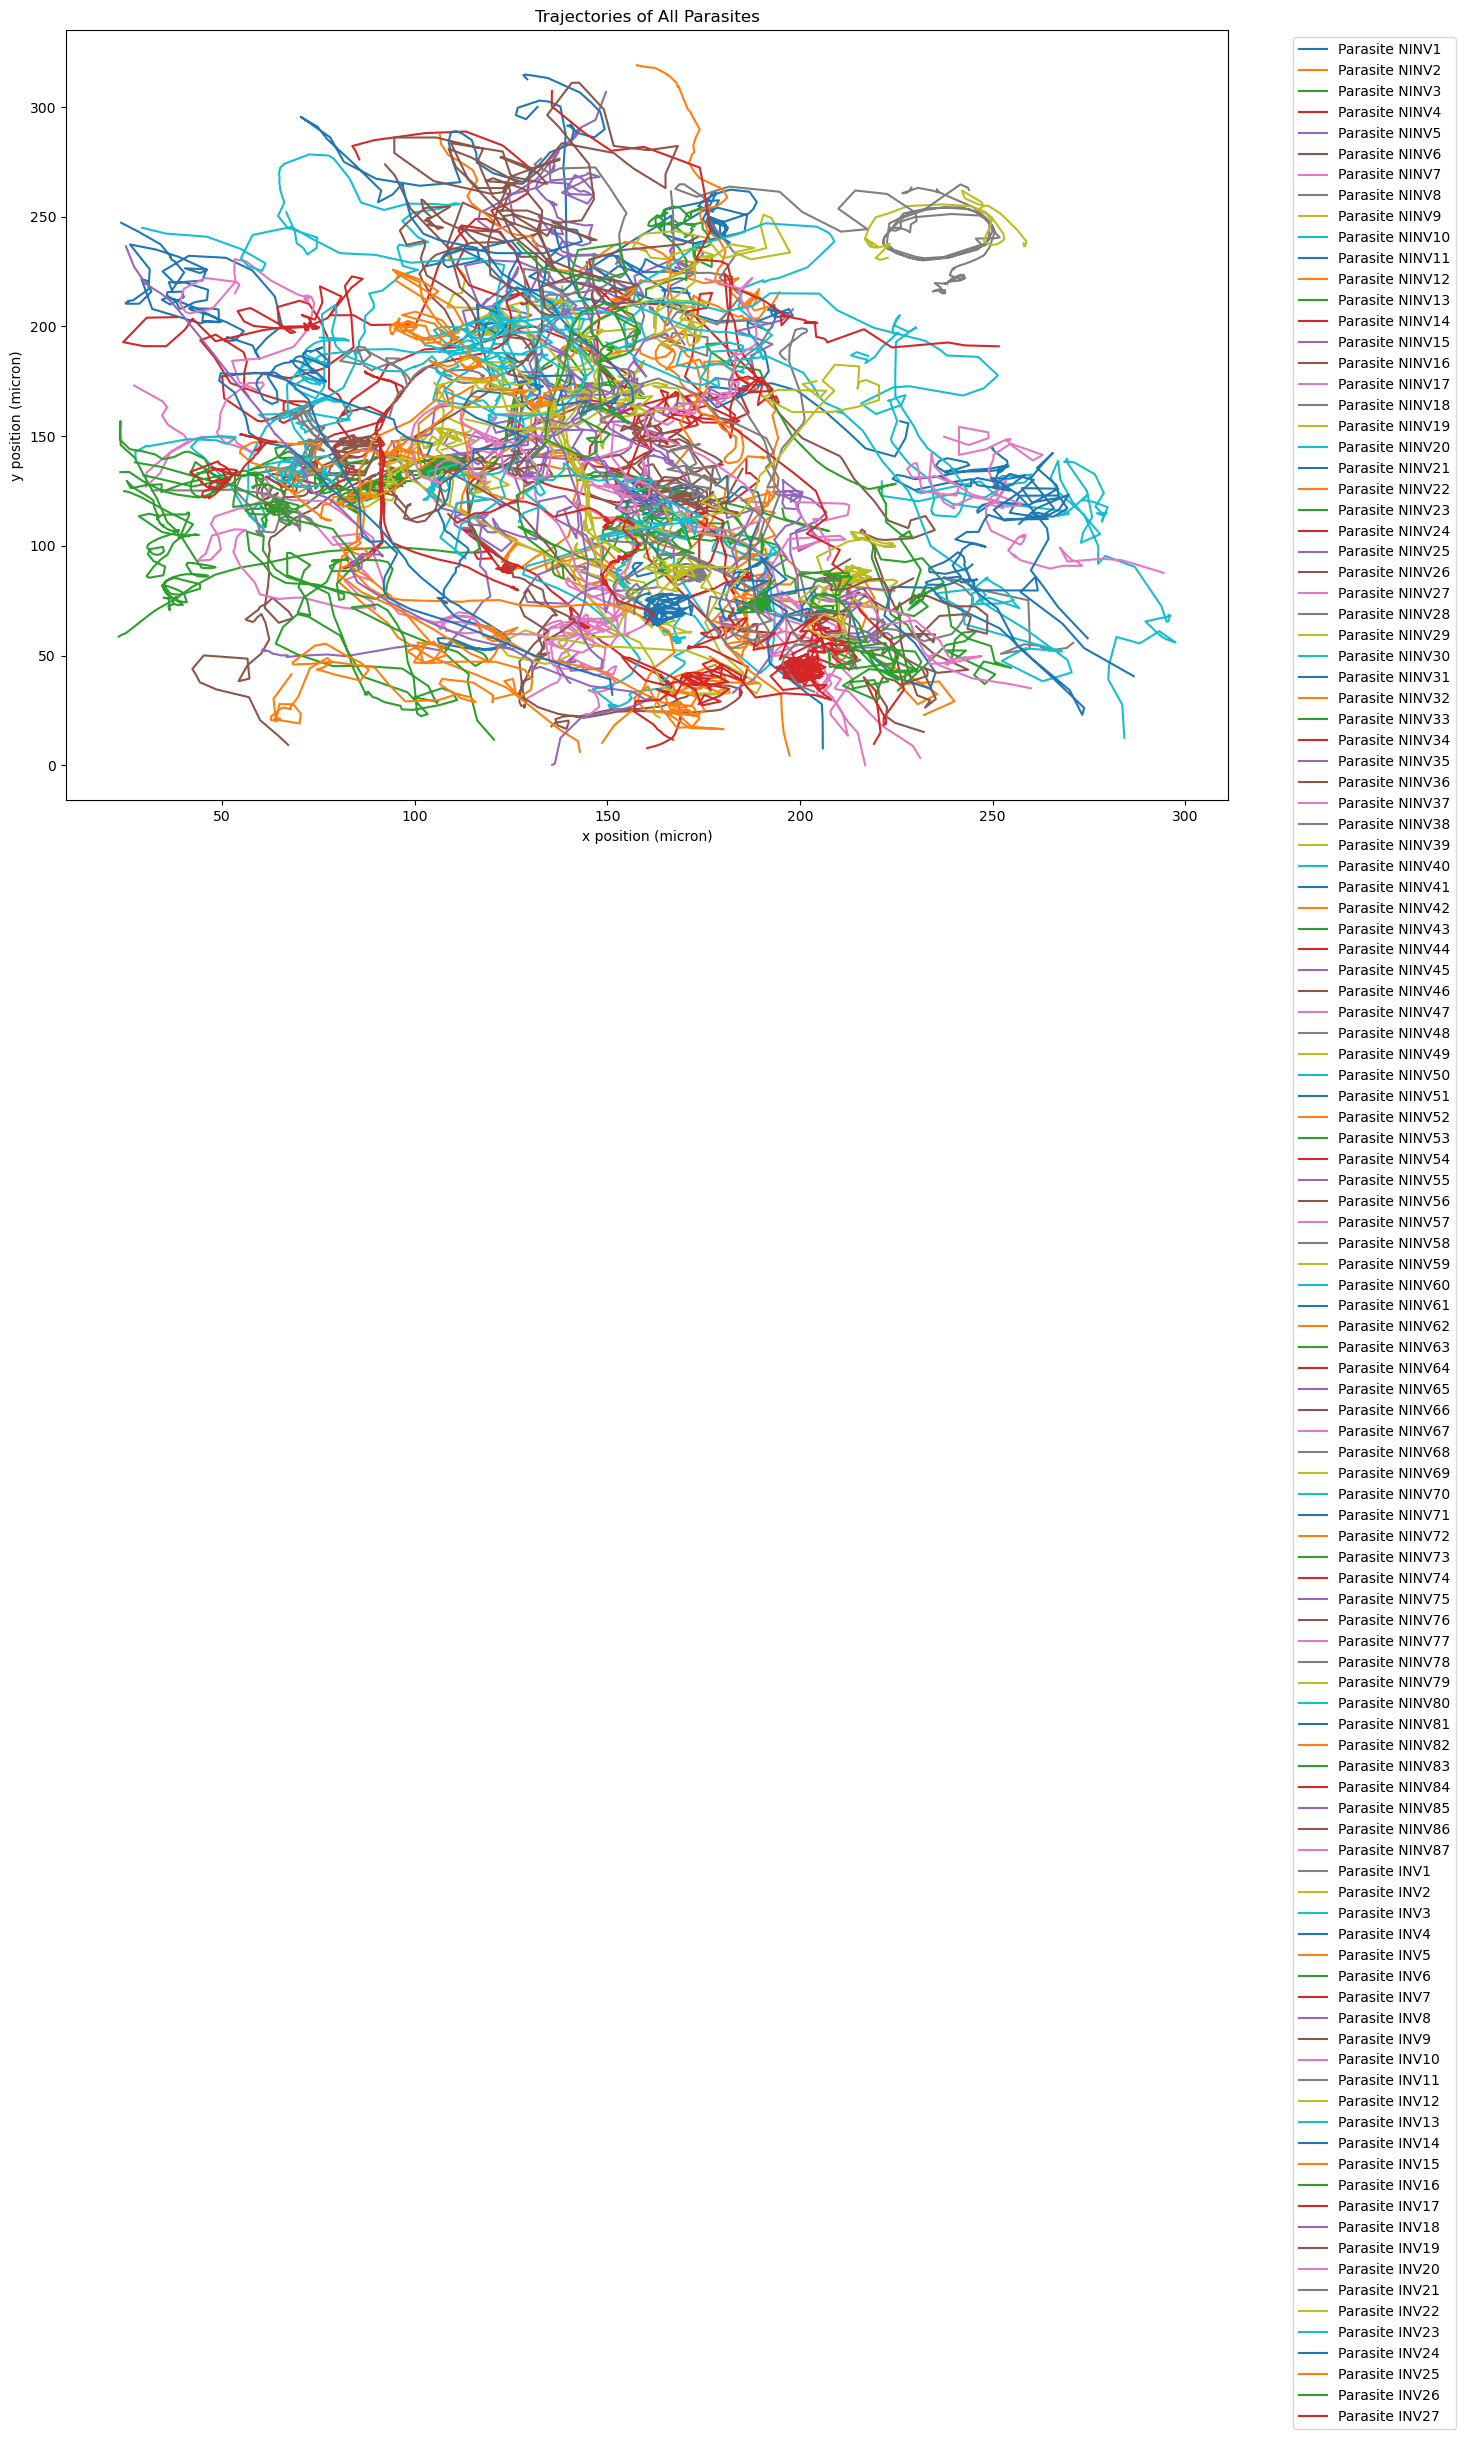

In [8]:
#Plot Trajectories(ALL)

#Get unique parasite IDs
all_parasites=data['PARASITE ID'].unique()

plt.figure(figsize=(15,10))
for parasite in all_parasites:
    parasite_data=data[data['PARASITE ID'] == parasite]
    plt.plot(parasite_data['x [micron]'], parasite_data['y [micron]'], label=f'Parasite {parasite}')

plt.xlabel('x position (micron)')
plt.ylabel('y position (micron)')
plt.title('Trajectories of All Parasites')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 2. Calculate distribution of average and instantaneous speeds for all parasites, mean squared displacement change with time for all parasites and generate plots of these characteristics.

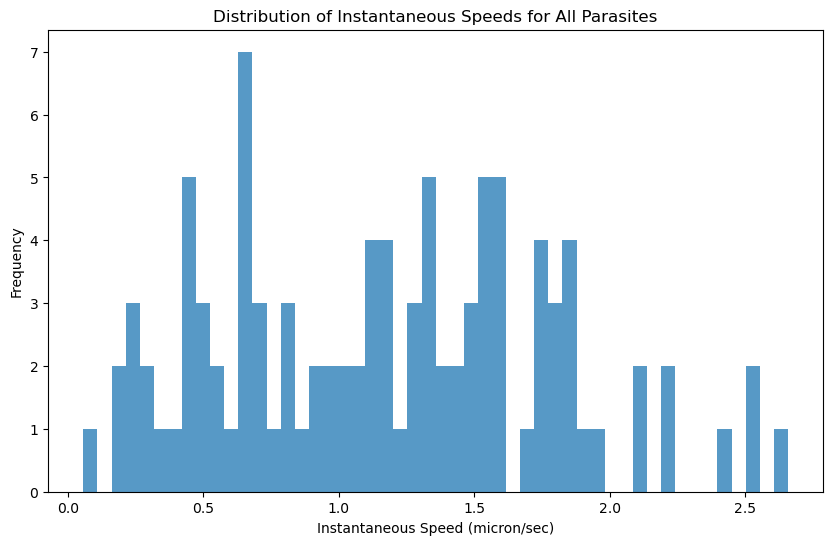

In [28]:
#Calculating and Plotting Speed and Displacement
import numpy as np

#Function to calculate instantaneous speeds
def calculate_instantaneous_speeds(parasite_data):
    time_diff=np.diff(parasite_data['t [sec]'], prepend=0) #Time differences
    pos_diff=np.sqrt(np.diff(parasite_data['x [micron]'], prepend=0)**2 + np.diff(parasite_data['y [micron]'], prepend=0)**2) #Positional differences
    instantaneous_speeds=pos_diff/time_diff #Speed calculation
    return instantaneous_speeds

#Calculate instantaneous speeds for all parasites
all_instantaneous_speeds=[]
for parasite in data['PARASITE ID'].unique():
    parasite_data = data[data['PARASITE ID']== parasite]
speeds= calculate_instantaneous_speeds(parasite_data)
all_instantaneous_speeds.extend(speeds)

#Plot the distribution of instantaneous speeds
plt.figure(figsize=(10, 6))
plt.hist(all_instantaneous_speeds, bins=50, alpha=0.75)
plt.xlabel('Instantaneous Speed (micron/sec)')
plt.ylabel('Frequency')
plt.title('Distribution of Instantaneous Speeds for All Parasites')
plt.show()

/var/folders/q1/4q18h1xj57sgxcm1pvfd4c400000gn/T/ipykernel_2911/3138097703.py:8: RuntimeWarning: divide by zero encountered in divide
  instantaneous_speeds=pos_diff/time_diff #Speed calculation


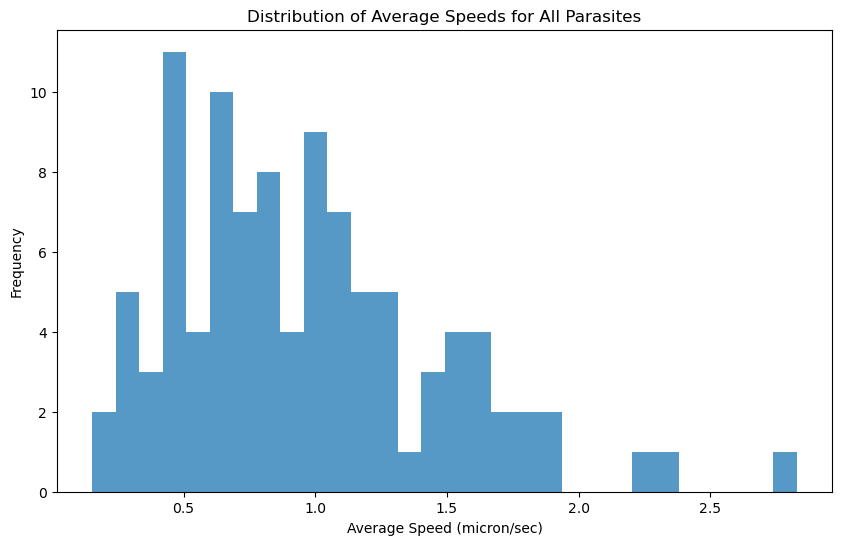

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate average speed
def calculate_average_speeds(parasite_data):
    speeds = calculate_instantaneous_speeds(parasite_data)
    average_speed = np.mean(speeds)
    return average_speed

# Calculate average speeds for all parasites
all_average_speeds = []
for parasite in data['PARASITE ID'].unique():
    parasite_data = data[data['PARASITE ID'] == parasite]
    avg_speed = calculate_average_speeds(parasite_data)
    if np.isfinite(avg_speed):  # Filter out non-finite values
        all_average_speeds.append(avg_speed)

# Plot the distribution of average speeds
plt.figure(figsize=(10, 6))
plt.hist(all_average_speeds, bins=30, alpha=0.75)
plt.xlabel('Average Speed (micron/sec)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Speeds for All Parasites')
plt.show()

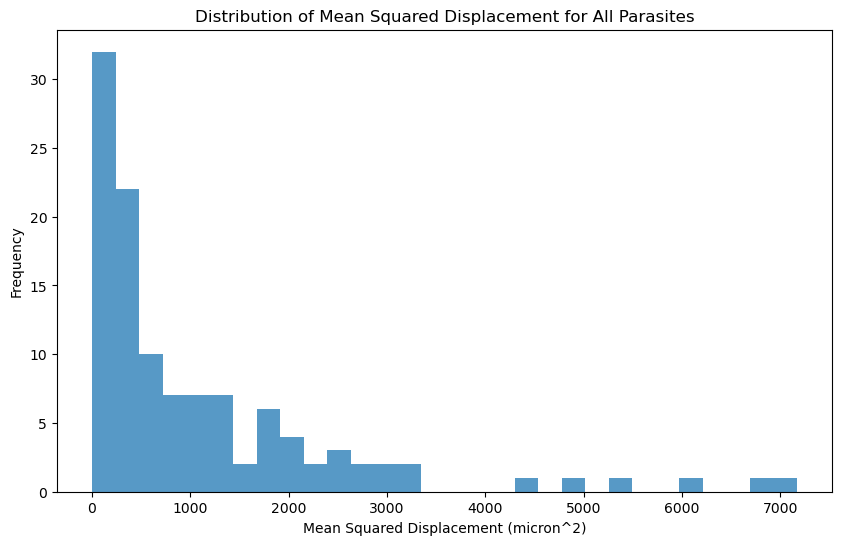

In [32]:
#Function to calculate mean squared displacement
def calculate_msd(parasite_data):
    x_mean=np.mean(parasite_data['x [micron]'])
    y_mean=np.mean(parasite_data['y [micron]'])
    msd=np.mean((parasite_data['x [micron]']- x_mean)**2 + (parasite_data['y [micron]']- y_mean)**2)
    return msd
    
 #Calculate MSD for all parasites
all_msds=[]
for parasite in data['PARASITE ID'].unique():
    parasite_data=data[data['PARASITE ID']== parasite]
    msd= calculate_msd(parasite_data)
    all_msds.append(msd)

#Plot distribution of MSD
plt.figure(figsize=(10,6))
plt.hist(all_msds, bins=30, alpha=0.75)
plt.xlabel('Mean Squared Displacement (micron^2)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Squared Displacement for All Parasites')
plt.show()

### 3. Using machine learning (or other techniques), what movement patterns of the parasites can you detect? How many groups of parasites are there?

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

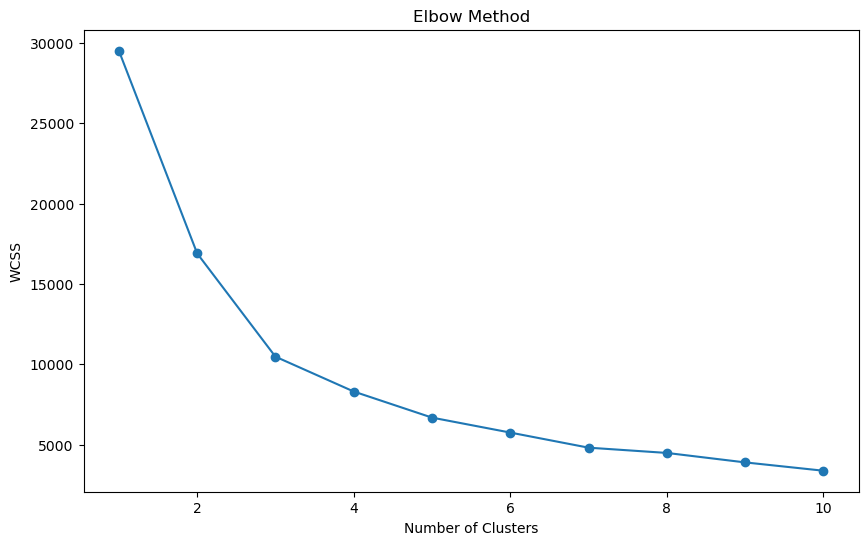

In [52]:
#Prepare data for clustering
features= data[['x [micron]', 'y [micron]']]
scaler= StandardScaler()
scaled_features= scaler.fit_transform(features)

#Determine optimal number of clusters using elbow method
wcss= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
#Based on the elbow, it appears there are 3 distinct groups of parasites

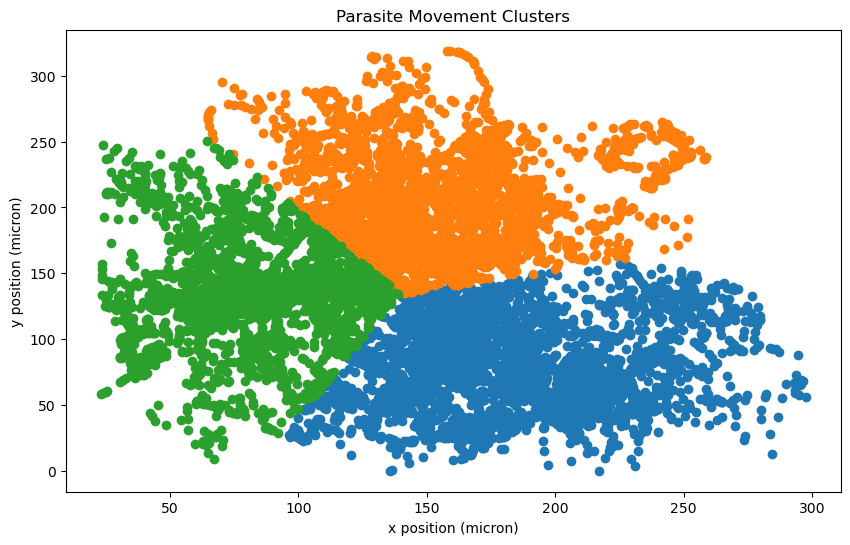

In [54]:
#Apply KMeans clustering
kmeans= KMeans(n_clusters=3, random_state=42)
data['cluster']= kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10,6))
for cluster in np.unique(data['cluster']):
    cluster_data= data[data['cluster'] == cluster]
    plt.scatter(cluster_data['x [micron]'], cluster_data['y [micron]'],
label=f'Cluster {cluster}')

plt.xlabel('x position (micron)')
plt.ylabel('y position (micron)')
plt.title('Parasite Movement Clusters')
plt.legend
plt.show()

### 4. Can you propose a machine learning-based method to predict movement pattern from a given trajectory data? What is the precision/AUC of your method?

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
AUC: 1.00


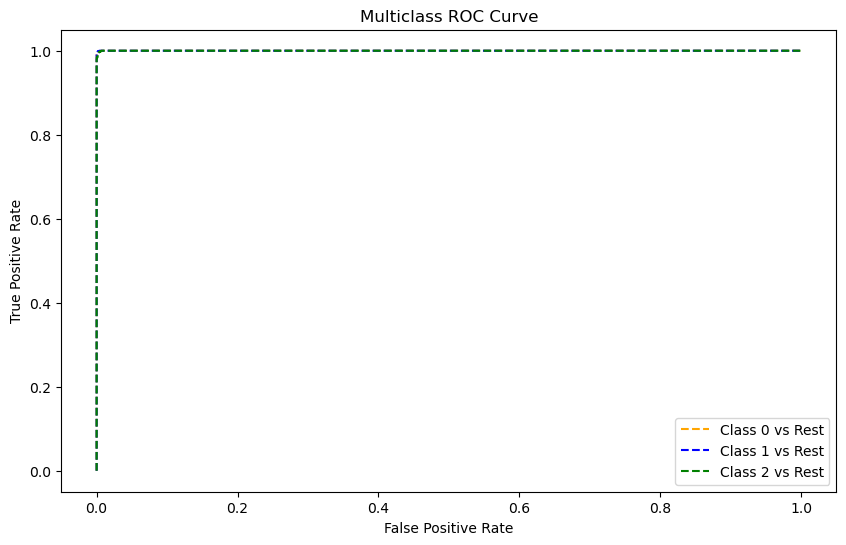

In [69]:
#Prepare data for classification
X= scaled_features
y= data['cluster']

#Split data into training and testing sets
X_train, X_Test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

#Train a Random Forest classifier
model= RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Predict and evaluate model
y_pred= model.predict(X_Test)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred, average='weighted')
recall= recall_score(y_test, y_pred, average='weighted')
auc=roc_auc_score(y_test, model.predict_proba(X_Test), multi_class='ovr')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC: {auc:.2f}')

#Plot ROC curves
fpr= {}
tpr= {}
thresh= {}

for i in range (3):
    fpr[i], tpr[i], thresh[i]= roc_curve(y_test, model.predict_proba(X_Test) [:,i], pos_label=i)

plt.figure(figsize=(10,6))
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='blue', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='green', label='Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

In [73]:
#Cross-Validate Model
from sklearn.model_selection import cross_val_score

cv_scores= cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')

Cross-Validation Accuracy Scores: [0.97899729 0.99186992 0.98611111 0.99220867 0.99390244]
Mean Cross-Validation Accuracy: 0.99
